<h1>Facial Landmark Detection in Python with OpenCV</h1>
<br>
<b>Welcome!</b>

<a id="top"></a>
<h2>Table of Contents</h2>
<ul>
    <li><a href="#00">Install Packages</a></li>
    <li><a href="#01">Retrieve Image</a></li>
    <li><a href="#02">Image Processing</a></li>
    <li><a href="#03">Face Detection</a></li>
    <li><a href="#04">Facial Landmarks Detection</a></li>
    <li><a href="#05">Credits</a></li>
</ul>

<b> Used openCV 4.1.2 and Python 3.7</b>

<a id="00"></a>

## Install Packages

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Import the OpenCV package

In [1]:
import cv2
print(cv2.__version__)

4.1.2


#### Import other required packages

In [2]:
# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams

<a id="01"></a>
## Retrieve Image

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download an image

In [3]:
# save picture's url in pics_url variable
pics_url = "https://upload.wikimedia.org/wikipedia/commons/archive/7/76/20170623195932%21Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"

# save picture's name as pic
pic = "image.jpg"

# chech if picture is in working directory
if (pic in os.listdir(os.curdir)):
    print("Picture exists")
else:
    # download picture from url and save locally as image.jpg
    urlreq.urlretrieve(pics_url, pic)
    print("Picture downloaded")

Picture exists


#### Display downloaded image

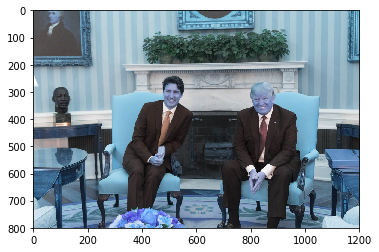

In [4]:
# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

<a id="02"></a>
## Image Processing

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Fix image colours

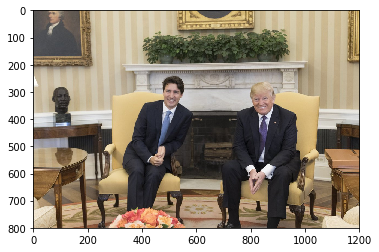

In [5]:
# convert image to RGB colour
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot image with matplotlib package
plt.imshow(image_rgb)

#### Crop Image

``Crop image to a specific size using the image's axes, with top-left of the image being (0,0). 
Use image[y:y+depth, x:x+width],
where x and y are the left-hand-side axes to start the cropping.
Width and depth are the x and y dimensions for the cropped image respectively.``


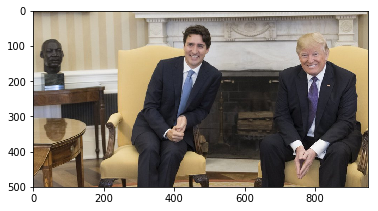

In [6]:
# set dimension for cropping image
x, y, width, depth = 50, 200, 950, 500
image_cropped = image_rgb[y:(y+depth), x:(x+width)]

# create a copy of the cropped image to be used later
image_template = image_cropped.copy()

# show image
plt.imshow(image_cropped)

#### Image Zoom In

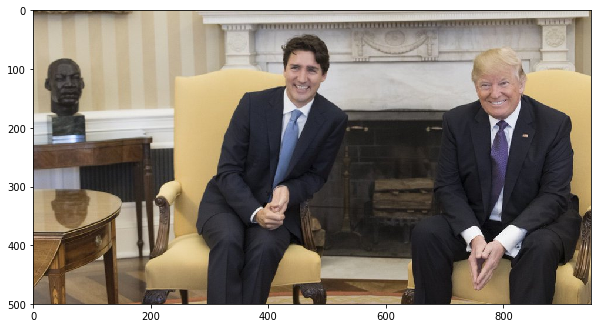

In [7]:
# Set zooming parameters
rcParams['figure.figsize'] = 10, 12
plt.imshow(image_cropped)

#### Remove the displayed axes

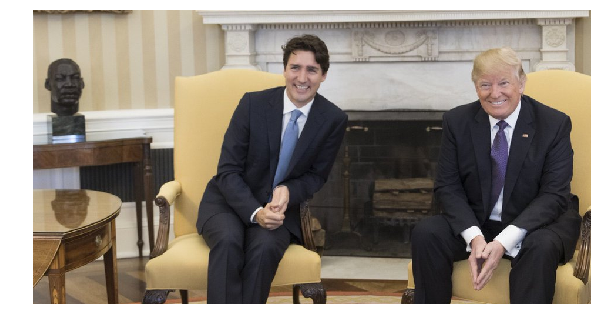

In [8]:
plt.axis("off")
plt.imshow(image_cropped)

#### Convert image to GrayScale

Note: Face detection algorithm used here performs better with grayscale images 

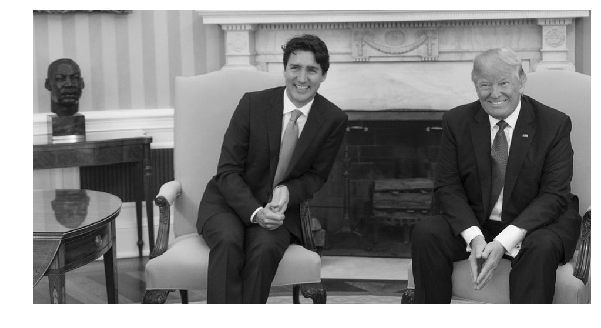

In [9]:
# convert image to Grayscale
image_gray = cv2.cvtColor(image_cropped, cv2.COLOR_BGR2GRAY)

# remove axes
plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

<a id="03"></a>
## Face Detection

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download face detection algorithm

In [10]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File exists


#### Detect Faces

In [11]:
# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(image_gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

Faces:
 [[424  71  74  74]
 [ 29  92  63  63]
 [745  96  78  78]]


#### Display Detected Faces

Text(0.5,1,'Face Detection')

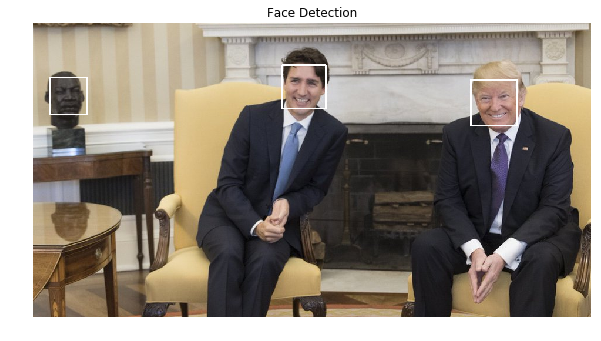

In [12]:
for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')

<a id="04"></a>
## Facial Landmarks Detection

<br><a href="#top" style="text-align:left;">Back to Top</a>

#### Download Facial Landmark Detection Models

In [13]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists


#### Get facial landmarks

In [14]:
# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(image_gray, faces)

# print coordinates of detected landmarks
print("Landmarks\n", landmarks)

landmarks LBF
 [array([[[429.76846 ,  95.483116],
        [429.20792 , 104.64616 ],
        [429.15186 , 113.98282 ],
        [429.87326 , 122.9254  ],
        [431.7641  , 131.43272 ],
        [435.59677 , 139.79823 ],
        [440.55942 , 147.5433  ],
        [446.39536 , 153.64473 ],
        [454.28885 , 156.30588 ],
        [462.56625 , 155.79045 ],
        [470.08136 , 151.25572 ],
        [476.87683 , 144.97098 ],
        [482.70615 , 137.27129 ],
        [486.78412 , 129.5946  ],
        [489.72534 , 121.51154 ],
        [492.0263  , 112.98909 ],
        [494.22498 , 104.24596 ],
        [434.8766  ,  95.45461 ],
        [439.69565 ,  91.83031 ],
        [446.11438 ,  91.49338 ],
        [452.49374 ,  92.5361  ],
        [458.00064 ,  95.53463 ],
        [464.53607 ,  96.38199 ],
        [471.09375 ,  95.22219 ],
        [477.75327 ,  96.33386 ],
        [483.77103 ,  98.43088 ],
        [487.61963 , 103.09929 ],
        [460.29553 , 101.4112  ],
        [459.5134  , 108.199646]

#### Display Landmarks

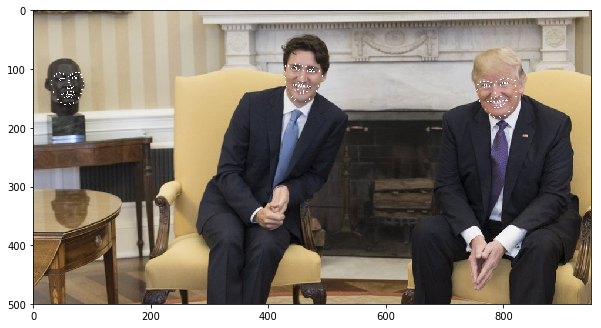

In [15]:
for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with red colour in RGB and thickness -1
        cv2.circle(image_cropped, (x, y), 1, (255, 255, 255), 1)
# plt.axis("off")
plt.imshow(image_cropped)

#### Zoom in to each landmarks

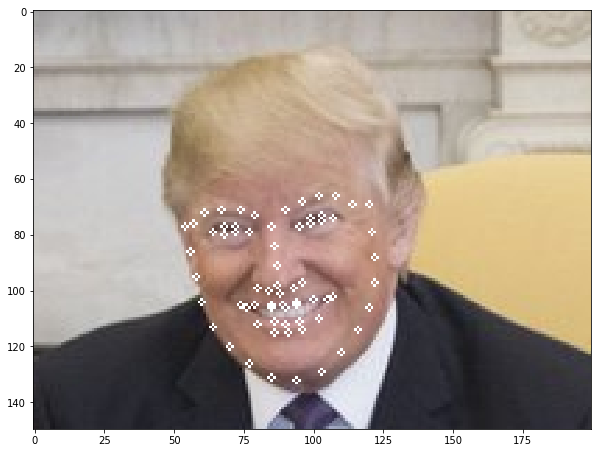

In [16]:
# set cropped image
x, y, width, depth = 700, 50, 200, 150
image_cropped3 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped3)

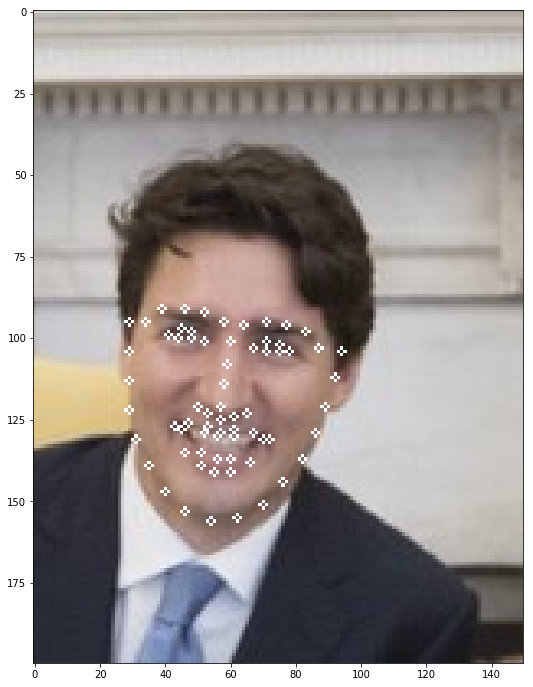

In [17]:
# set cropped image
x, y, width, depth = 400, 0, 150, 200
image_cropped2 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped2)

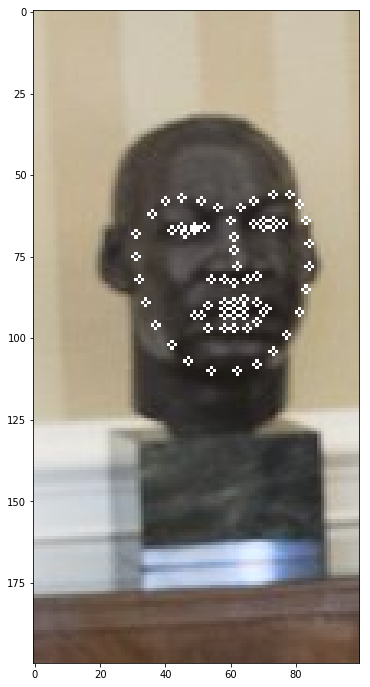

In [18]:
# set cropped image
x, y, width, depth = 0, 50, 100, 200
image_cropped1 = image_cropped[y:(y+depth), x:(x+width)]

plt.imshow(image_cropped1)

<a id="05"></a>
## Credits

<br><a href="#top" style="text-align:left;">Back to Top</a>

https://github.com/albertofernandezvillan
<br>https://github.com/kurnianggoro/GSOC2017
<br>https://github.com/sacchitchadha
<br>https://github.com/tensorflowlagos